In [179]:
!pip install requests --quiet
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [537]:
df = pd.read_excel('Online Retail.xlsx')

In [539]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [899]:
#data cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [699]:
df.isnull().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [701]:
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [905]:
df1 =df.dropna()
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [907]:
df2 = df1.copy()
df2['CustomerID'] =df2['CustomerID'].astype('int64')

In [909]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [911]:
df2.describe().round()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.0,406829,406829.0,406829.0
mean,12.0,2011-07-10 16:30:57.879207424,3.0,15288.0
min,-80995.0,2010-12-01 08:26:00,0.0,12346.0
25%,2.0,2011-04-06 15:02:00,1.0,13953.0
50%,5.0,2011-07-31 11:48:00,2.0,15152.0
75%,12.0,2011-10-20 13:06:00,4.0,16791.0
max,80995.0,2011-12-09 12:50:00,38970.0,18287.0
std,249.0,NaN,69.0,1714.0


In [739]:
#remove negative quantity 

In [913]:
df2 = df2[df2.Quantity > 0]

In [915]:
df2.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.00,397924,397924.00,397924.00
mean,13.02,2011-07-10 23:43:36.912475648,3.12,15294.32
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13969.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:33:00,3.75,16795.00
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00
std,180.42,NaN,22.10,1713.17


In [825]:
#EDA ANALYSIS
#TOP 10 VALUABLE CUSTOMERS

In [975]:
df3 = df2.copy()
df3["Totalspend"]= df3['Quantity'] * df3['UnitPrice']


In [919]:
df3.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalspend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


In [921]:
valuable_customers = df3.groupby('CustomerID')['Totalspend'].sum().sort_values(ascending=False)
valuable_customers.head(10)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: Totalspend, dtype: float64

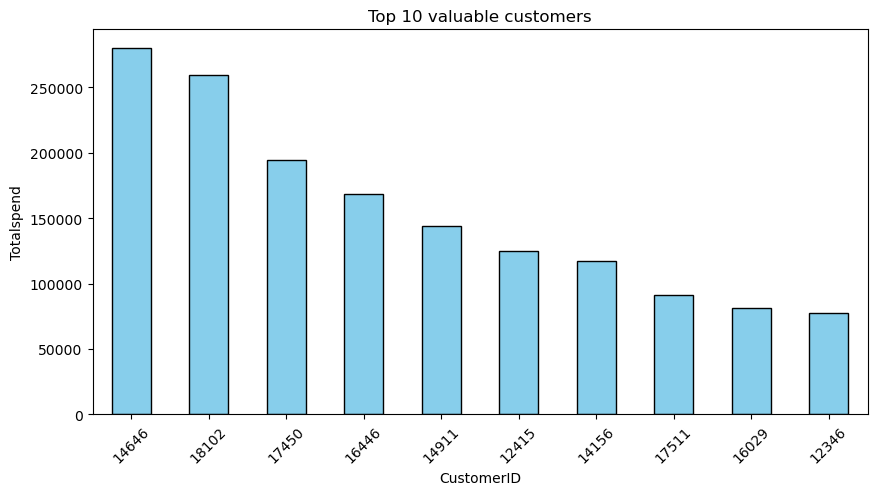

In [1139]:
plt.figure(figsize=(10,5))
valuable_customers.head(10).plot(kind="bar", color="skyblue",edgecolor="black")
plt.title("Top 10 valuable customers")
plt.xlabel("CustomerID")
plt.ylabel("Totalspend")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#TOP 10 VALUABLE PRODUCTS

In [925]:
top_products = df3.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

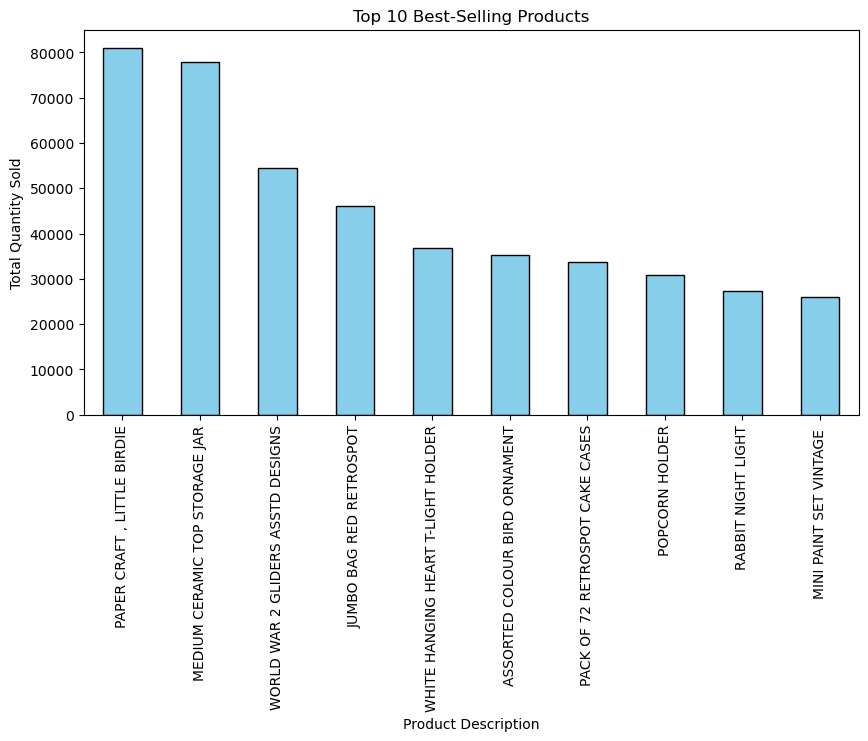

In [1137]:
plt.figure(figsize=(10,5))
top_products.head(10).plot(kind="bar", color="skyblue",edgecolor="black")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#TOP 10 REVENUE BY COUNTRY

In [929]:
country_revenue = df3.groupby("Country")["Totalspend"].sum().sort_values(ascending=False).head(10)
country_revenue

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Totalspend, dtype: float64

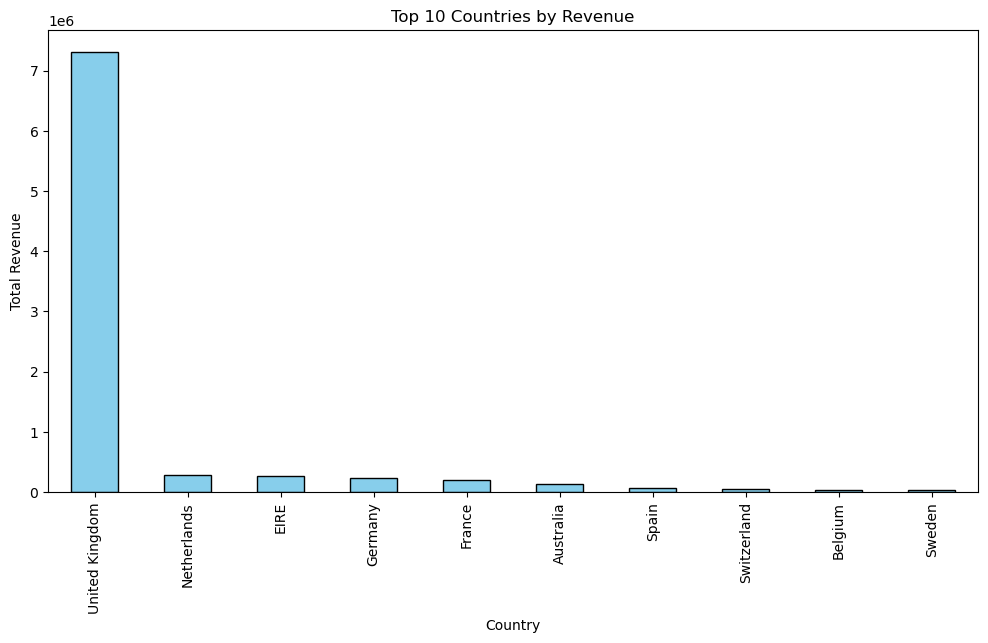

In [1143]:
plt.figure(figsize=(12,6))
country_revenue.plot(kind="bar",color="skyblue",edgecolor="black")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#sales Trens over time 

In [977]:
df3["Month"] =df3["InvoiceDate"].dt.month
df3["day"] =df3["InvoiceDate"].dt.day
df3["Year"] =df3["InvoiceDate"].dt.year
df3["Date"] =df3["InvoiceDate"].dt.date


In [1069]:
df3.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalspend,Month,day,Year,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,12,1,2010,2010-12-01


In [1107]:
yearly_sales = df3.groupby("Year")["Totalspend"].sum()


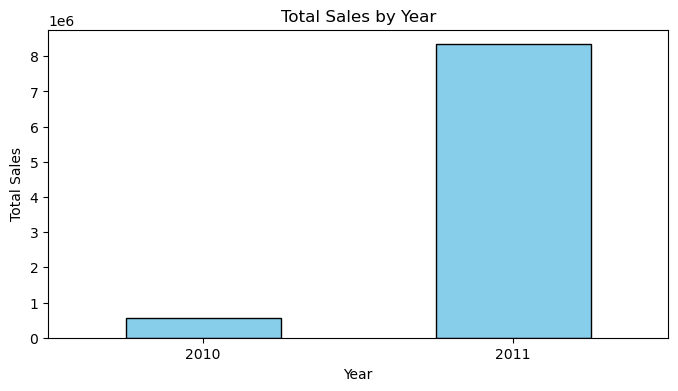

In [1145]:
plt.figure(figsize=(8,4))
yearly_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()

In [1111]:
monthly_sales = df3.groupby('Month')["Totalspend"].sum()
month_map = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
monthly_sales.index = monthly_sales.index.map(month_map)

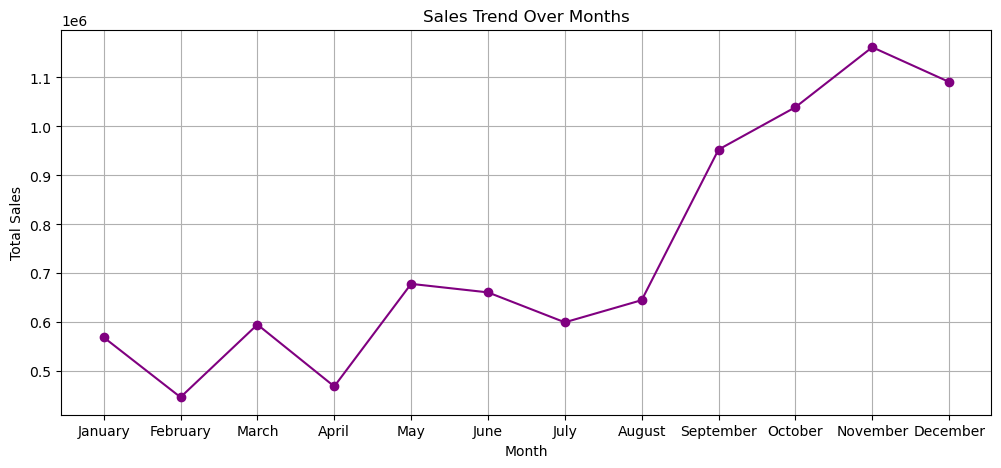

In [1151]:
plt.figure(figsize=(12,5))
monthly_sales.plot(marker="o", linestyle="-", color="purple")
plt.title("Sales Trend Over Months")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(ticks=range(12), labels=list(month_map.values()), rotation=45)
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [1095]:
daily_sales = df3.groupby("day")["Totalspend"].sum()

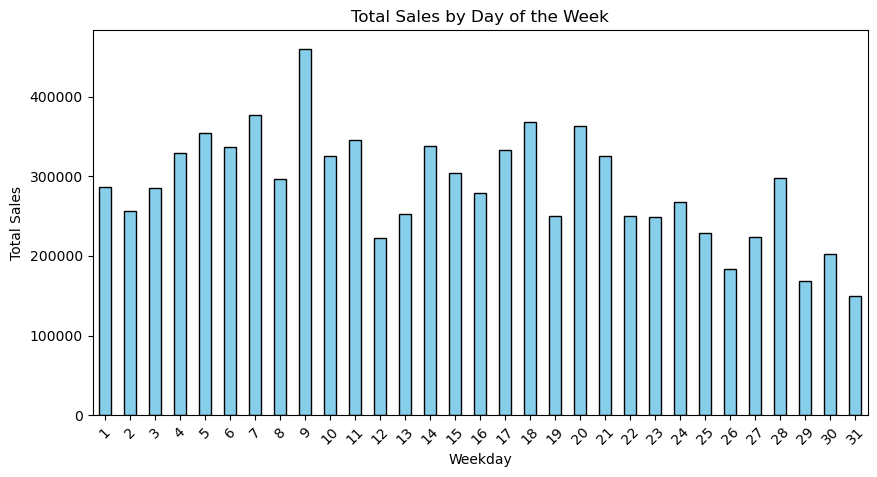

In [1147]:
plt.figure(figsize=(10,5))
daily_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#conclusion